<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 4 - Convolutional Neural Networks with Sequential and Functional API - Aladdin Persson anlattı.
</font>

**Video:** [TensorFlow Tutorial 4 - Convolutional Neural Networks with Sequential and Functional API](https://www.youtube.com/watch?v=WAciKiDP2bo&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=4)

### İçindekiler

**CIFAR 10 Dataset**

**Loading Dataset**

**Preprocessing Dataset**

**Creating Convolutional Neural Network**
* Sequential API Kullanarak
* Functional API Kullanarak

**Suggestions**

### Kaynaklar

* CNN'in çalışma mantığını hatırlamak [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)  için yazısına bakabilirsin. 


* Batch Normalization konusu için [DeepLearningAI - Why Does Batch Norm Work? (C2W3L06)](https://www.youtube.com/watch?v=nUUqwaxLnWs) videosuna bakabilirsin.

In [1]:
import tensorflow as tf
from tensorflow import keras

### CIFAR 10 Dataset

10 different classes, 50.000 training images, 10.000 test images, 32x32 pixels RGB. 

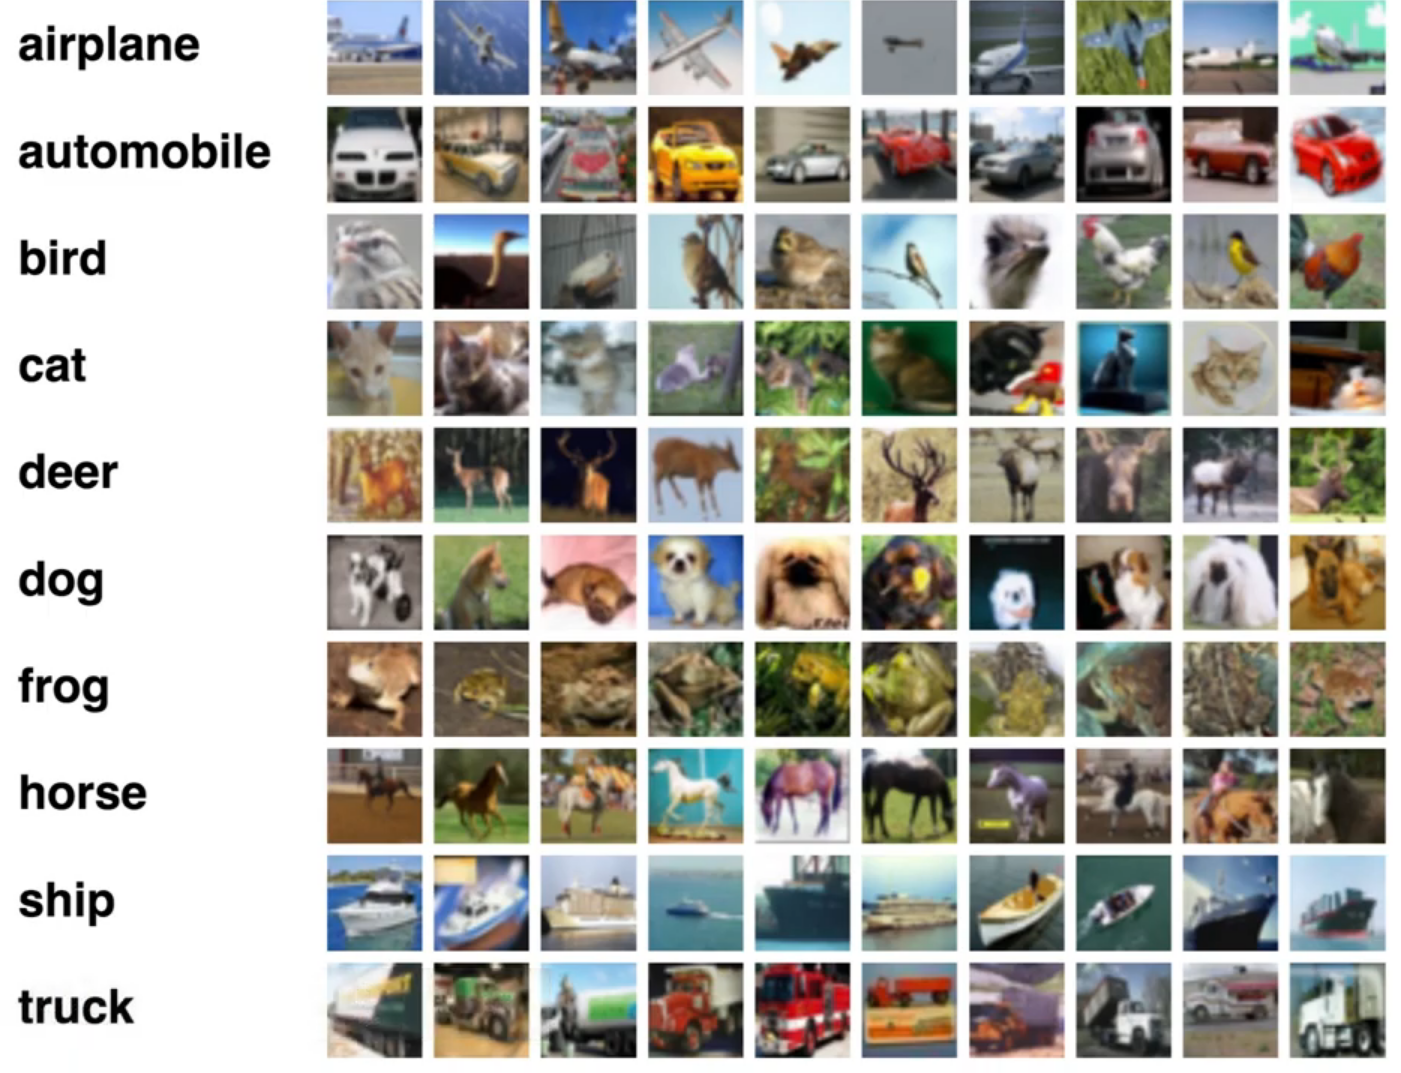

Andrej Karpathy [Lessons learned from manually classifying CIFAR-10](http://karpathy.github.io/2011/04/27/manually-classifying-cifar10/) blog yazısında insanların %94 doğruluk oranıyla bu resimleri sınıflandırdığından bahsetmiş. Şu anda geliştirilen modeller bundan daha iyi başarı elde edebiliyor. 

### 1. Loading Dataset

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 2. Preprocessing Dataset

1. `x_train.astype("float32")` koduyla **computationı minimize etmek** için type'ı float64'ten float32'ye dönüştürüyoruz.


2. `x_train.astype("float32") / 255.0` ile piksel değerlerini **normalize** ediyoruz. 


3. Aynı işlemi `x_test = x_test.astype("float32") / 255.0` koduyla **test seti için de** yapıyoruz. 

In [5]:
x_train = x_train.astype("float32") / 255.0 

In [6]:
x_test = x_test.astype("float32") / 255.0 

### 3. Creating Convolutional Neural Network

####  <font color="blue"> 3.1. Sequential API Kullanarak</font>

##### <font color="green"> `model = keras.Sequential()` içerisinde liste halinde layerları yazıyoruz. </font>

In [21]:
model = keras.Sequential(
[
    keras.Input(shape=(32,32,3)),
    layers.Conv2D(32, 3, padding='valid', activation='relu'),    
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10) # output nodes
]
)

In [22]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

* `keras.Input(shape=(32,32,3))` yazdık. Fully connected neural networkte flatten yapmıştık direkt ve bu kısmı `keras.Input(shape=(28*28))` şeklinde yazmıştık. Burada ilk aşamada flatten yapmadığımız için aynen geçiriyoruz boyutları. 


* `layers.Conv2D(32, 3, padding='valid')` ilk argüman(32) kaç tane channel istediğimizi belirtiyordu. 3 channella başladık outputu 32 olsun demiş olduk. İkinci argüman(3) kernel size'ı belirtiyor. Bir tane 3 yazdığımızda (3,3) gibi algılıyor height ve width olarak. `padding = 'same'` olarak belirttiğimizde pixelleri 32x32 şeklinde bırakacak. Ama eğer `padding = 'valid'` dersek 30x30 olacak pixeller. Yazmasak da default olarak `padding = 'valid'` tanımlı. `activation='relu'` ile neural networklerde olduğu gibi aktivasyon fonksiyonu ekliyoruz. 


* `layers.MaxPooling2D(pool_size=(2,2))` ile max pooling yapıp pool_size'ı 2,2 belirtiyoruz. Bu inputu yarıya düşürecek. 'valid' convolutional kullandığı için 30x30 idi artık inputun boyutu 15x15 olacak. İçine bir şey yazmayınca da `pool_size=(2,2)` algılıyor.

Her layerı ekledikten sonra dışarıda `print(model.summary())` koduyla özetini alıp input boyutlarını kontrol edebilirsin.

###### <font color="purple"> Output boyutunu hesaplama: </font>

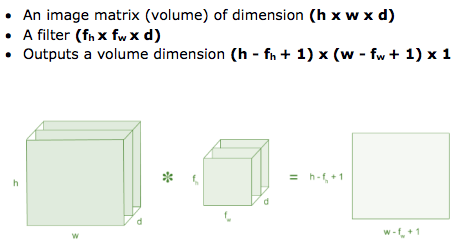

- Input: (32 x 32 x 3) 

- Conv2D'deki filter: (3 x 3 x 1)

Output: (32-3+1) x (32-3+1) x **32** -> 30 x 30 x 32 

- Input: (15 x 15 x 32) 

- Conv2D'deki filter: (3 x 3 x 1)

Output: (15-3+1) x (15-3+1) x **64** -> 13 x 13 x 64 

Total params: 225,034 çok küçük bir network. O yüzden yüksek bir accuracy beklemiyoruz. 

##### <font color="green"> `model.compile()` içerisinde ağımızın eğitim bölümünü nasıl yapılandıracağımızı anlatıyoruz kerasa. </font>

In [9]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), # burada softmax uygulanıyor
    optimizer = keras.optimizers.Adam(lr=3e-4),
    metrics = ["accuracy"],
)

##### <font color="green"> `model.fit()` ile yapılandırdığımız modeli somut olarak eğitiyoruz. </font>

In [10]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
782/782 - 39s - loss: 1.6833 - accuracy: 0.3877
Epoch 2/10
782/782 - 41s - loss: 1.3648 - accuracy: 0.5090
Epoch 3/10
782/782 - 41s - loss: 1.2408 - accuracy: 0.5612
Epoch 4/10
782/782 - 42s - loss: 1.1440 - accuracy: 0.5965
Epoch 5/10
782/782 - 41s - loss: 1.0655 - accuracy: 0.6252
Epoch 6/10
782/782 - 41s - loss: 1.0038 - accuracy: 0.6479
Epoch 7/10
782/782 - 41s - loss: 0.9494 - accuracy: 0.6708
Epoch 8/10
782/782 - 41s - loss: 0.9046 - accuracy: 0.6866
Epoch 9/10
782/782 - 41s - loss: 0.8622 - accuracy: 0.7029
Epoch 10/10
782/782 - 41s - loss: 0.8308 - accuracy: 0.7136


##### <font color="green"> `model.evaluate()` ile test setimizi gönderip modelimizin başarısını değerlendiriyoruz. </font>

In [11]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.8925 - accuracy: 0.6935


[0.8925209045410156, 0.6934999823570251]

####  <font color="blue"> 3.2. Functional API Kullanarak</font>

##### <font color="green"> `my_model` fonksiyonu tanımlayıp layerları yazıyoruz. </font>

In [15]:
def my_model():
    inputs = keras.Input(shape=(32, 32, 3)) 
    x = layers.Conv2D(32,3)(inputs)
    x = layers.BatchNormalization()(x)  # Sequentialda da kullanabiliriz BatchNormalization layerını. 
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 5, padding='same')(x) # 64 channel, kernel size:5
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

model = my_model()

##### <font color="green"> `model.compile()` içerisinde ağımızın eğitim bölümünü nasıl yapılandıracağımızı anlatıyoruz kerasa. </font>

In [16]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr=3e-4),
    metrics = ["accuracy"],
)

##### <font color="green"> `model.fit()` ile yapılandırdığımız modeli somut olarak eğitiyoruz. </font>

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
782/782 - 233s - loss: 1.3301 - accuracy: 0.5285
Epoch 2/10
782/782 - 199s - loss: 0.8932 - accuracy: 0.6877
Epoch 3/10
782/782 - 201s - loss: 0.7174 - accuracy: 0.7488
Epoch 4/10
782/782 - 200s - loss: 0.6131 - accuracy: 0.7887
Epoch 5/10
782/782 - 199s - loss: 0.5246 - accuracy: 0.8182
Epoch 6/10
782/782 - 199s - loss: 0.4493 - accuracy: 0.8435
Epoch 7/10
782/782 - 197s - loss: 0.3847 - accuracy: 0.8690
Epoch 8/10
782/782 - 190s - loss: 0.3137 - accuracy: 0.8947
Epoch 9/10
782/782 - 192s - loss: 0.2649 - accuracy: 0.9120
Epoch 10/10
782/782 - 193s - loss: 0.2206 - accuracy: 0.9270


##### <font color="green"> `model.evaluate()` ile test setimizi gönderip modelimizin başarısını değerlendiriyoruz. </font>

In [18]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 7s - loss: 1.2291 - accuracy: 0.6786


[1.229056715965271, 0.678600013256073]

Training accuracynin çok iyi olup test setin accuracysinin kötü çıkmasından overfitting olduğunu anlayabiliriz. Bu tarz durumlarda regularization vs. yapıyoruz. (Bir sonraki videoda işlenecek regularization).

### 4. Suggestions

1. What accuracy can you get on the test set by training longer, increasing the model size, changing kernel size, play around padding etc.?


2. In the last video we trained a FC (fully connected neural network) on MNIST: what can you get by using a conv net instead?